In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [ ]:
def noise(mu,sd):
    n = np.random.normal(mu,sd)
    return n

In [ ]:
#lets caculate mse
def mse(a,b):
    d = []
    for i in range(len(b)-1):
        c = ((b[i]-a[i])**2)/2
        d.append(c)
    return np.mean(np.array(d))


In [ ]:
!pip install pykalman


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=3f4ff290e85fc8e1f0390237ecc3720f1d69b1631a0dec358b3bd3ecbafa230f
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

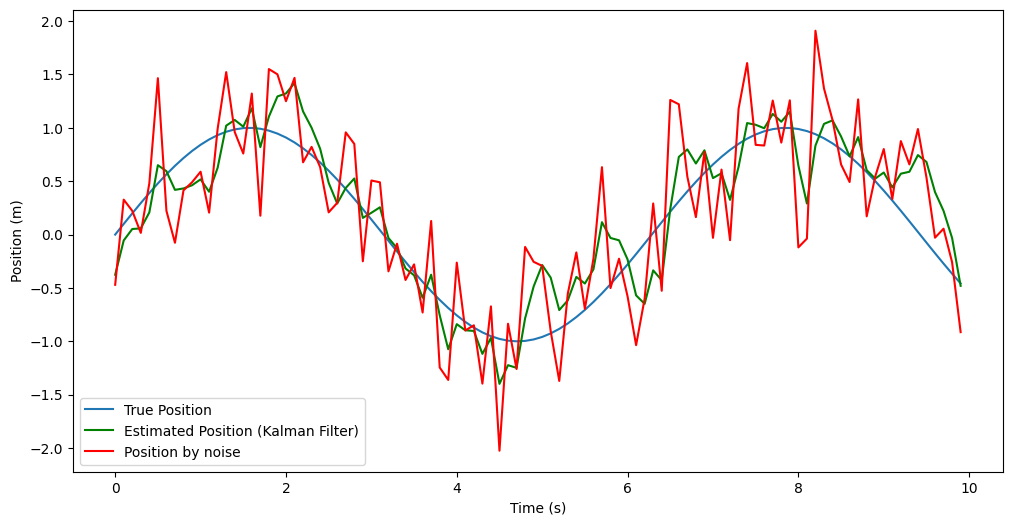

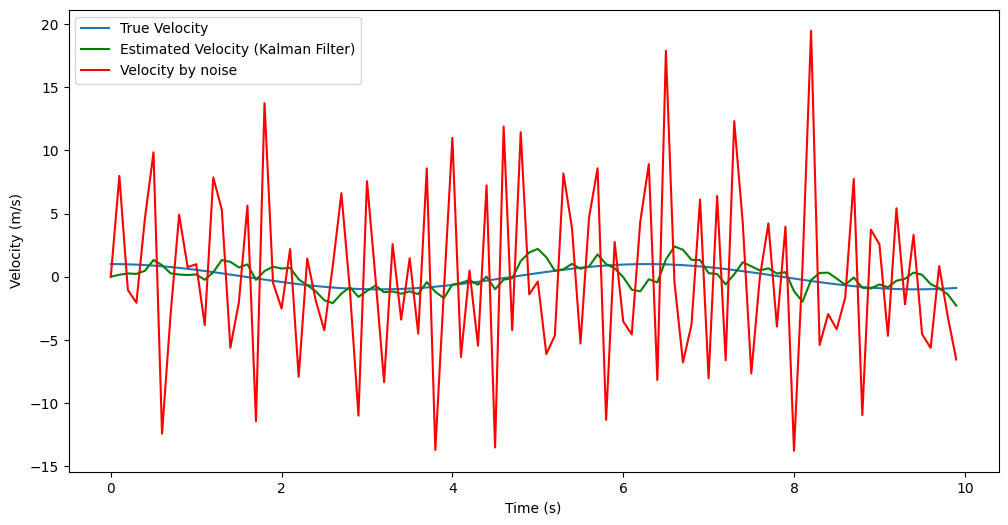

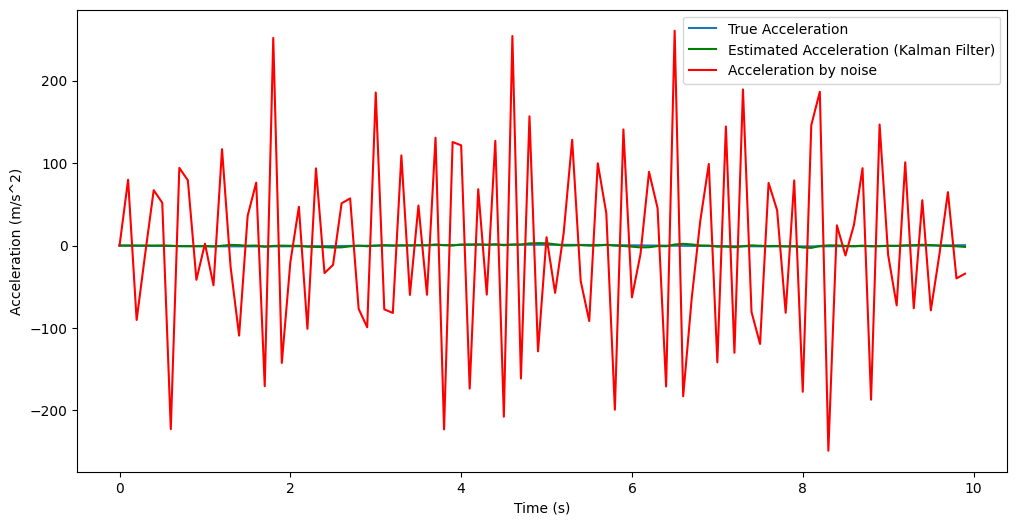

In [ ]:


# Define the system parameters
k = 1.0    # spring constant
m = 1.0    # mass attached to the spring
dt = 0.1   # time step
T = 100    # number of time steps
# Generate noisy sensor measurements of the position
sensor_noise = 0.5


time = np.arange(T) * dt

# Define the true position, velocity, and acceleration of the spring head
x_true = np.sin(time)
v_true = np.cos(time)
a_true = -k * x_true / m

z = x_true + np.random.normal(0, sensor_noise, size=T)


z_v =[0]
for i in range(len(z)-1):
    z_vel = (z[i+1] - z[i])/dt
    z_v.append(z_vel)

z_a = [0]
for i in range(len(z_v)-1):
    z_ace = (z_v[i+1] - z_v[i])/dt
    z_a.append(z_ace)






# Initialize the Kalman filter
kf = KalmanFilter(
    initial_state_mean=[0, 0, 0],
    initial_state_covariance=np.eye(3),
    transition_matrices=[[1, dt, 0.5*dt**2],
                         [0, 1, dt],
                         [0, -k/m*dt, 1]],
    observation_matrices=[[1, 0, 0]],
    observation_covariance=sensor_noise**2,
    transition_covariance=np.diag([0, 0.1, 1])**2,
    em_vars=['transition_covariance', 'observation_covariance']
)

# Perform the Kalman filtering on the noisy sensor measurements
(filtered_state_means, filtered_state_covariances) = kf.filter(z)

# Extract the estimated position, velocity, and acceleration from the filtered state means
x_est = filtered_state_means[:,0]
v_est = filtered_state_means[:,1]
a_est = filtered_state_means[:,2]

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(time, x_true, label='True Position')
plt.plot(time, x_est, 'g-', label='Estimated Position (Kalman Filter)')
plt.plot(time, z, 'r-', label='Position by noise')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(time, v_true, label='True Velocity')
plt.plot(time, v_est, 'g-', label='Estimated Velocity (Kalman Filter)')
plt.plot(time, z_v, '-r', label='Velocity by noise')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(time, a_true, label='True Acceleration')
plt.plot(time, a_est, 'g-', label='Estimated Acceleration (Kalman Filter)')
plt.plot(time, z_a, 'r-', label='Acceleration by noise')

plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

In [ ]:
mse(x_true,x_est)

0.046924492520813266

In [ ]:






def expriment(k,m,dt,T,sensor_noise):

  time = np.arange(T) * dt

  # Define the true position, velocity, and acceleration of the spring head
  x_true = np.sin(time)
  v_true = np.cos(time)
  a_true = -k * x_true / m

  z = x_true + np.random.normal(0, sensor_noise, size=T)
  z_v =[0]
  for i in range(len(z)-1):
      z_vel = (z[i+1] - z[i])/dt
      z_v.append(z_vel)

  z_a = [0]
  for i in range(len(z_v)-1):
      z_ace = (z_v[i+1] - z_v[i])/dt
      z_a.append(z_ace)






  # Initialize the Kalman filter
  kf = KalmanFilter(
      initial_state_mean=[0, 0, 0],
      initial_state_covariance=np.eye(3),
      transition_matrices=[[1, dt, 0.5*dt**2],
                          [0, 1, dt],
                          [0, -k/m*dt, 1]],
      observation_matrices=[[1, 0, 0]],
      observation_covariance=sensor_noise**2,
      transition_covariance=np.diag([0, 0.1, 1])**2,
      em_vars=['transition_covariance', 'observation_covariance']
  )

  # Perform the Kalman filtering on the noisy sensor measurements
  (filtered_state_means, filtered_state_covariances) = kf.filter(z)

  # Extract the estimated position, velocity, and acceleration from the filtered state means
  x_est = filtered_state_means[:,0]
  v_est = filtered_state_means[:,1]
  a_est = filtered_state_means[:,2]

  # Plot the results
  plt.figure(figsize=(12,6))
  plt.plot(time, x_true, label='True Position')
  plt.plot(time, x_est, 'g-', label='Estimated Position (Kalman Filter)')
  plt.plot(time, z, 'r-', label='Position by noise')

  plt.legend()
  plt.xlabel('Time (s)')
  plt.ylabel('Position (m)')
  plt.show()

  plt.figure(figsize=(12,6))
  plt.plot(time, v_true, label='True Velocity')
  plt.plot(time, v_est, 'g-', label='Estimated Velocity (Kalman Filter)')
  plt.plot(time, z_v, '-r', label='Velocity by noise')

  plt.legend()
  plt.xlabel('Time (s)')
  plt.ylabel('Velocity (m/s)')
  plt.show()

  plt.figure(figsize=(12,6))
  plt.plot(time, a_true, label='True Acceleration')
  plt.plot(time, a_est, 'g-', label='Estimated Acceleration (Kalman Filter)')
  plt.plot(time, z_a, 'r-', label='Acceleration by noise')

  plt.legend()
  plt.xlabel('Time (s)')
  plt.ylabel('Acceleration (m/s^2)')
  plt.show()

  print(f'filtering loss : {mse(x_true,x_est)}')
  print(f'without filtering loss : {mse(x_true,z)}')

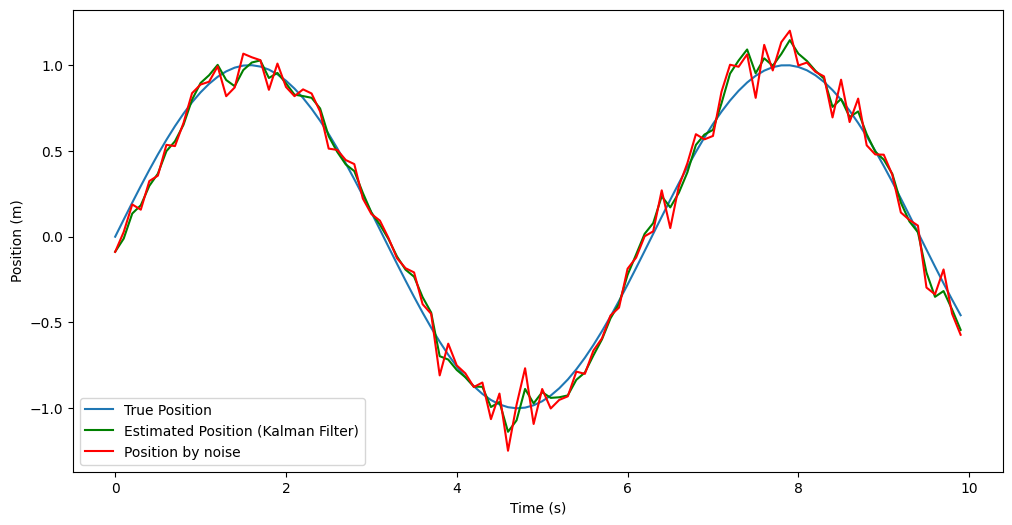

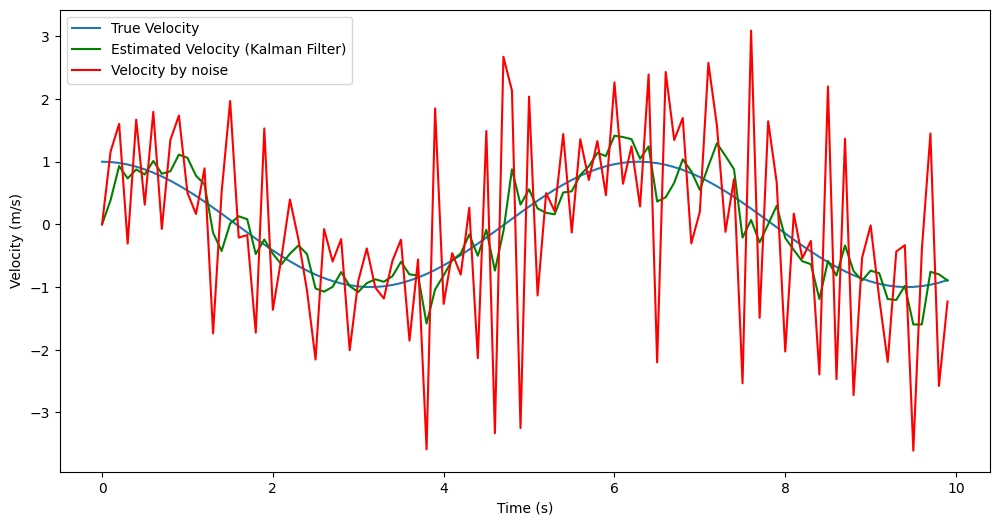

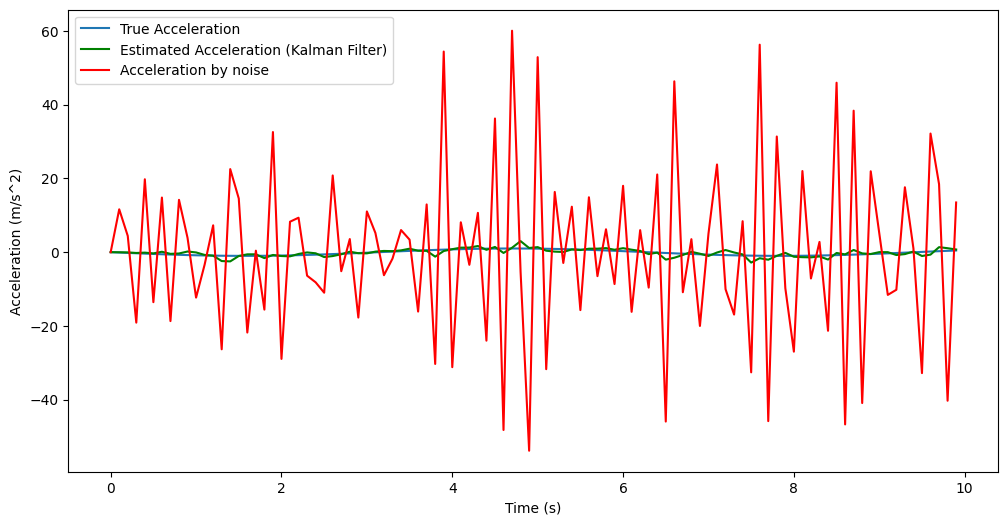

filtering loss : 0.0025033643056066547
without filtering loss : 0.0045763663693135


In [ ]:
expriment(1,1,0.1,100,0.1)

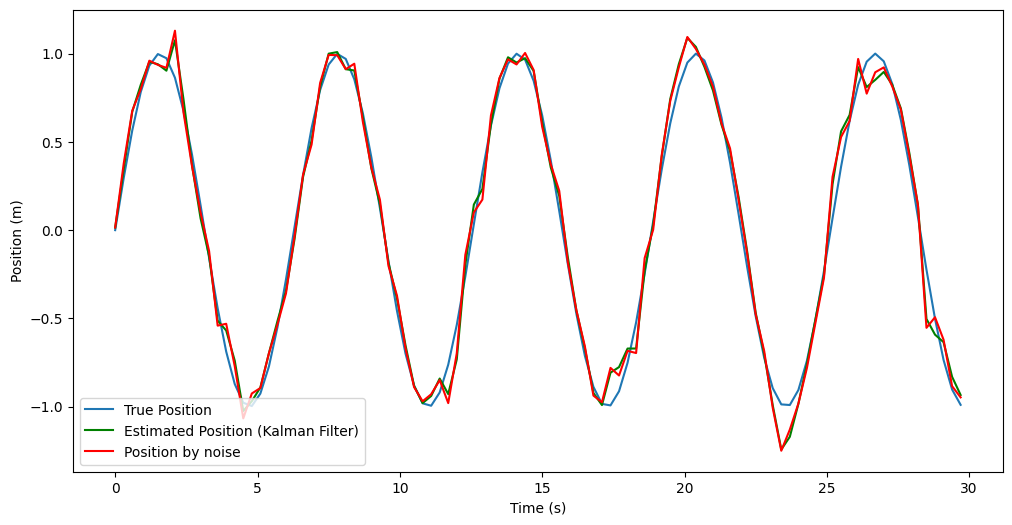

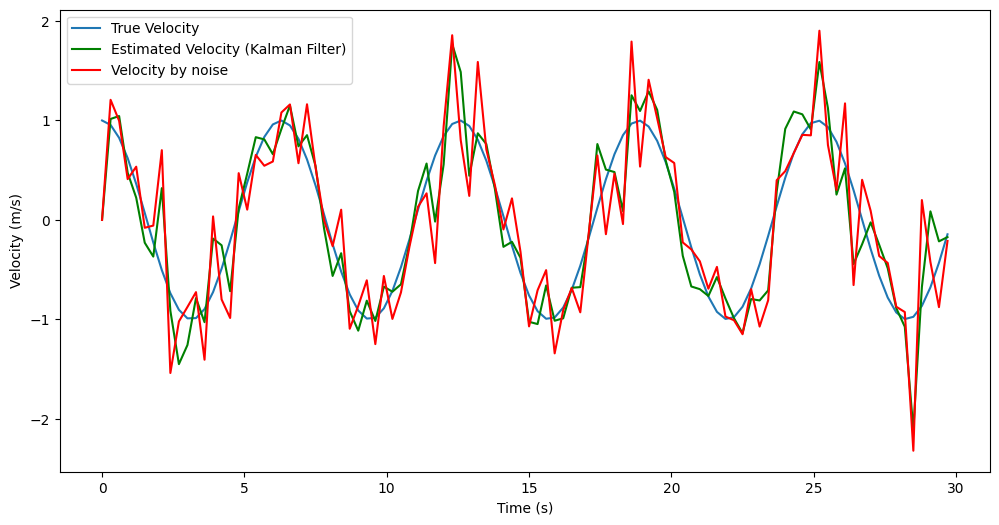

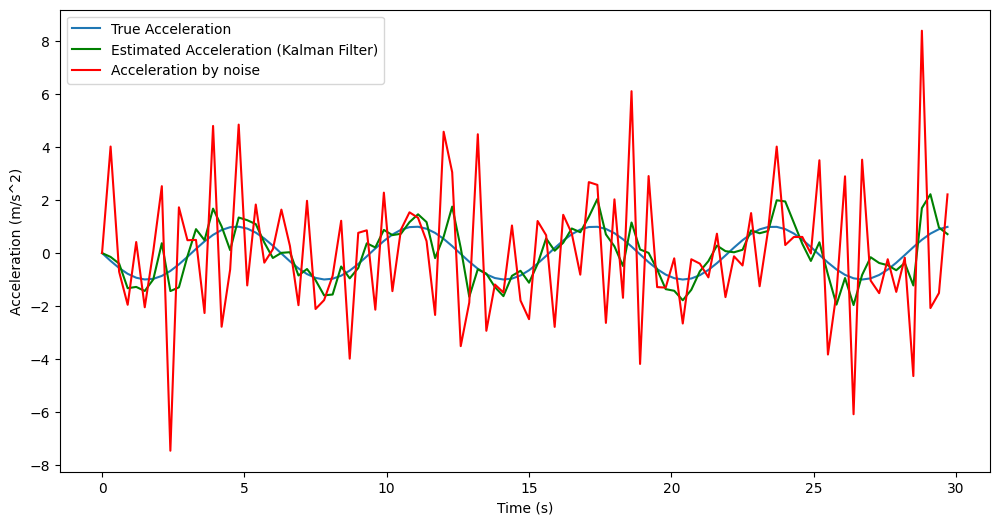

filtering loss : 0.004187173553560731
without filtering loss : 0.004836244713611659


In [ ]:
expriment(1,1,0.1,100,0.3)

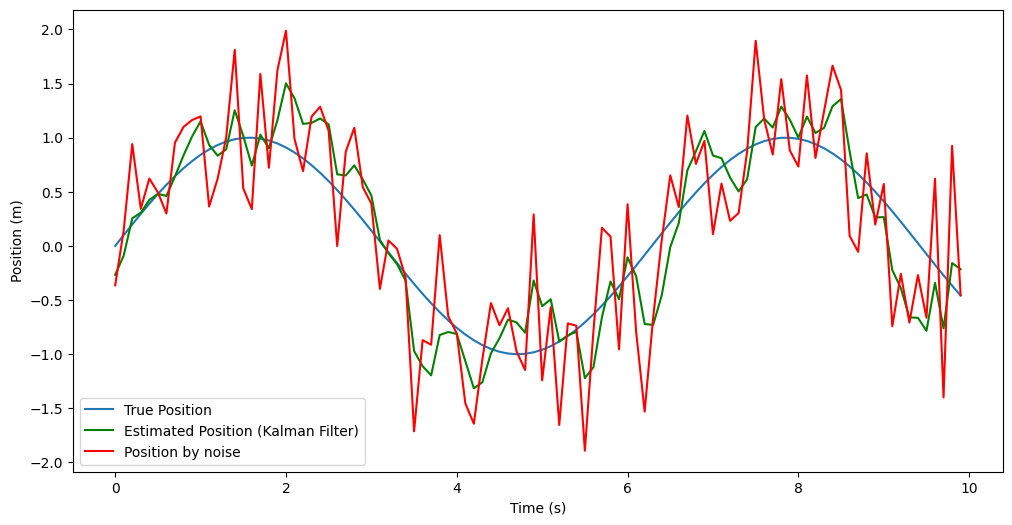

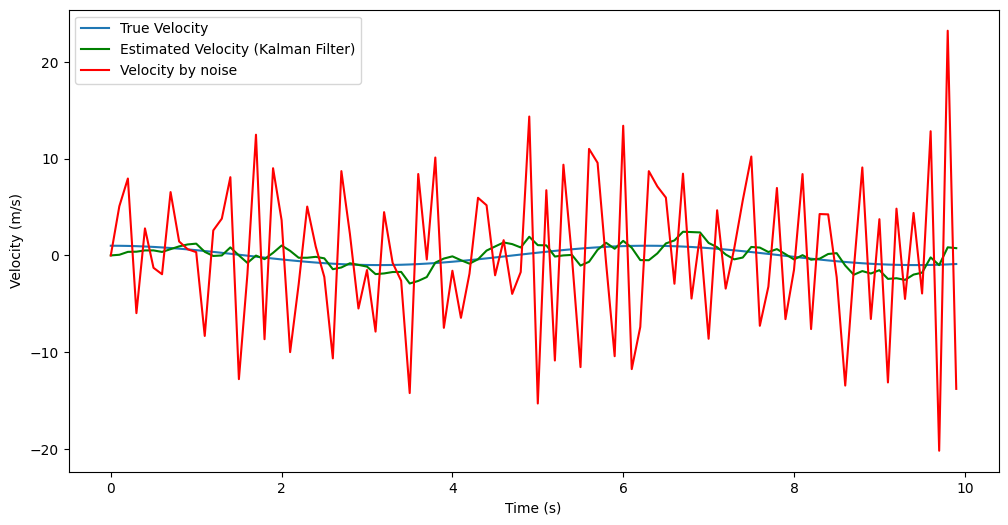

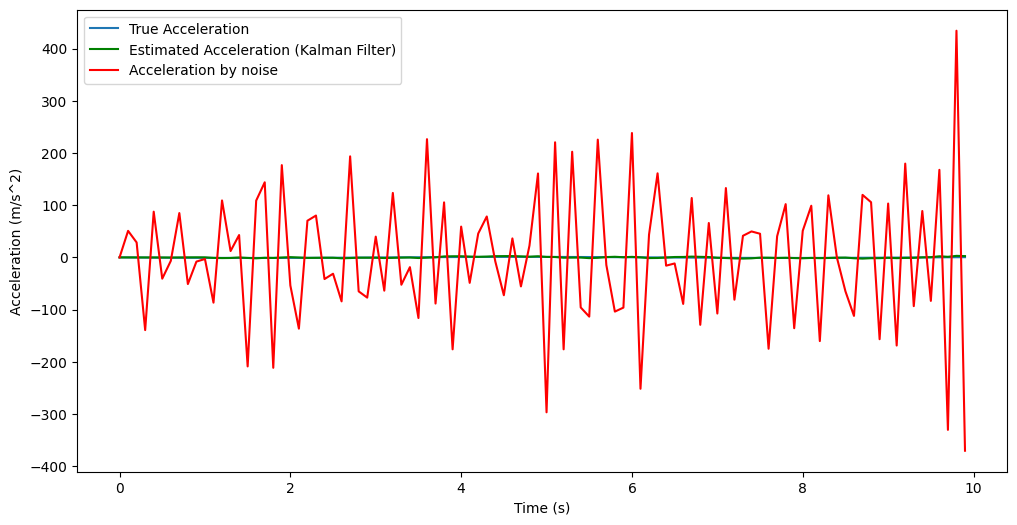

filtering loss : 0.056993642924289406
without filtering loss : 0.16115718930155964


In [ ]:
expriment(1,1,0.1,100,0.6)

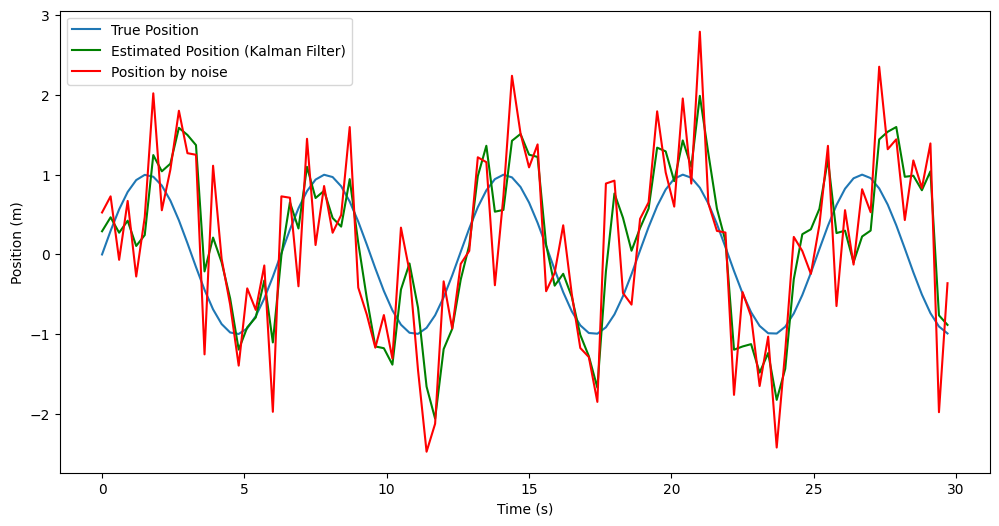

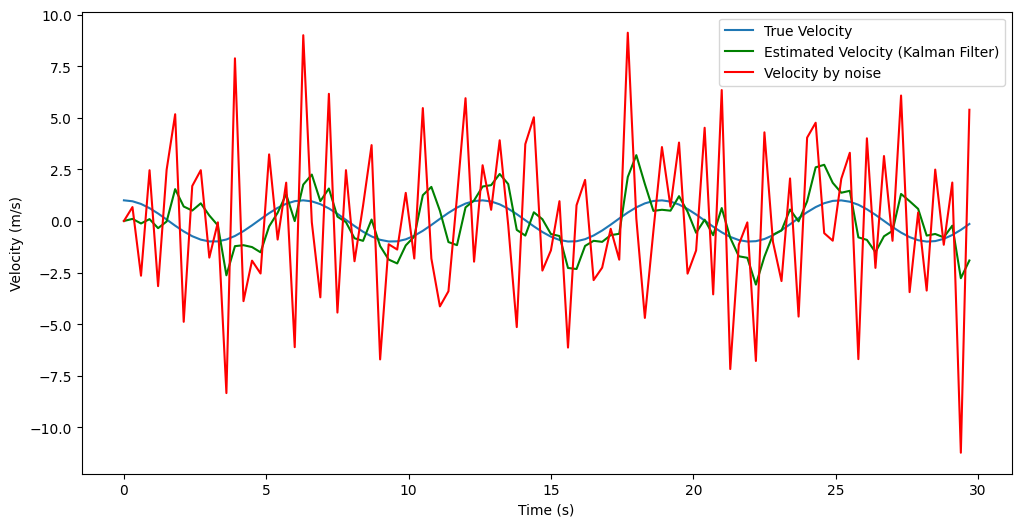

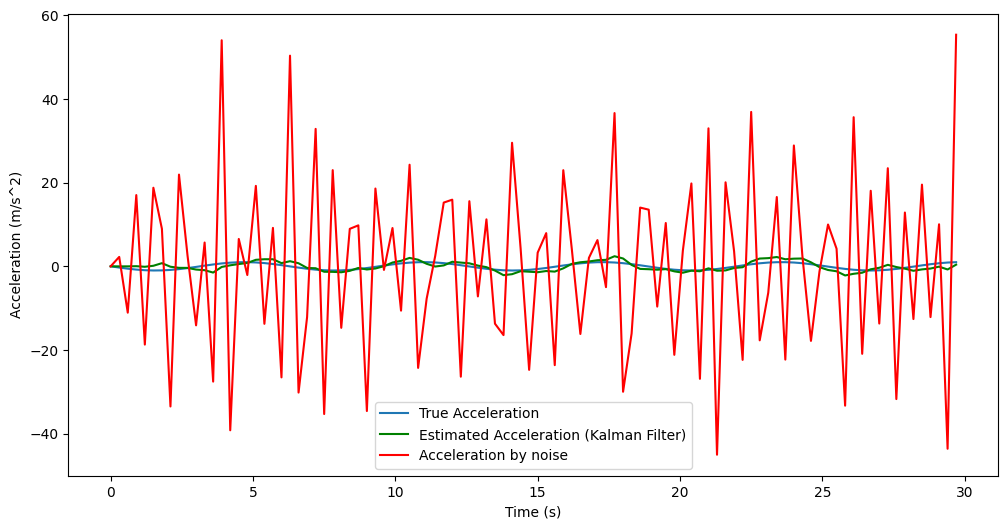

filtering loss : 0.22636100604478226
without filtering loss : 0.3829992903564315


In [ ]:
expriment(1,1,0.3,100,0.9)